In [1]:
#import
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from network_control.metrics import node_strength, ave_control, modal_control
from network_control.utils import rank_int, matrix_normalization
from network_control.plotting import set_plotting_params, reg_plot
set_plotting_params()

In [2]:
# load data
workdir = '/Users/lindenmp/Google-Drive-Penn/work/research_projects/control_package/'
A = np.load(os.path.join(workdir, 'A.npy'))
A = A[:, :, :200]
n_nodes = A.shape[0]
n_subs = A.shape[2]
g = 0
gradient = np.loadtxt((os.path.join(workdir, 'gradients.txt')))[:, g]

In [3]:
# compute strength and average controllability
s = np.zeros((n_subs, n_nodes))
ac = np.zeros((n_subs, n_nodes))
for i in np.arange(n_subs):
    a = A[:, :, i]
    s[i, :] = node_strength(a)
    ac[i, :] = ave_control(matrix_normalization(a))

In [4]:
# compute cross subject correlations
corr_s_ac = np.zeros(n_nodes)
for i in np.arange(n_nodes):
    s[:, i] = rank_int(s[:, i])
    ac[:, i] = rank_int(ac[:, i])
    corr_s_ac[i] = sp.stats.pearsonr(s[:, i], ac[:, i])[0]

## Plot corr(s,ac) over the principal cortical gradient of FC

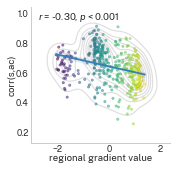

In [5]:
f, ax = plt.subplots(1, 1, figsize=(2.5, 2.5))
reg_plot(x=gradient, y=corr_s_ac, xlabel='regional gradient value', ylabel='corr(s,ac)', ax=ax, c=gradient)
plt.show()
f.savefig('corr(grad,corr_s_ac)', dpi=300, bbox_inches='tight', pad_inches=0.1)
